In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from permetrics.regression import RegressionMetric

In [2]:
proj_dir = Path('../..')

In [3]:
test_data = pd.read_csv(proj_dir / 'methods/04-ml_development/var1/RFR1_test_set.csv')
test_data['Date'] = pd.to_datetime(test_data['Date'])
# filter data from 2020 onwards
test_data = test_data[test_data['Date'].dt.year >= 2020]


In [4]:
test_reaches = {
    1: "Columbia_River_96",
    2: "Kootenay_River_35",
    3: "Okanogan_River_13",
    4: "Willamette_River_20",
}

insitu_fp = {
    1: proj_dir / 'Data/insitu/conditions/processed/USBR_GCGW.csv',
    2: proj_dir / 'Data/insitu/conditions/processed/USGS_12301933.csv',
    3: proj_dir / 'Data/insitu/conditions/processed/USGS_12439500.csv',
    4: proj_dir / 'Data/insitu/conditions/processed/USGS_14174000.csv',
}

In [5]:
test_reach_1 = test_data[test_data["Name"] == test_reaches[1]].sort_values("Date")
test_reach_2 = test_data[test_data["Name"] == test_reaches[2]].sort_values("Date")
test_reach_3 = test_data[test_data["Name"] == test_reaches[3]].sort_values("Date")
test_reach_4 = test_data[test_data["Name"] == test_reaches[4]].sort_values("Date")

insitu_data_1 = pd.read_csv(insitu_fp[1]).rename(columns={"date": "Date"})
insitu_data_1['Date'] = pd.to_datetime(insitu_data_1['Date']).dt.tz_localize(None)
insitu_data_1 = insitu_data_1[insitu_data_1['Date'].dt.year >= 2020]
insitu_data_2 = pd.read_csv(insitu_fp[2]).rename(columns={"date": "Date"})
insitu_data_2['Date'] = pd.to_datetime(insitu_data_2['Date']).dt.tz_localize(None)
insitu_data_2 = insitu_data_2[insitu_data_2['Date'].dt.year >= 2020]
insitu_data_3 = pd.read_csv(insitu_fp[3]).rename(columns={"date": "Date"})
insitu_data_3['Date'] = pd.to_datetime(insitu_data_3['Date']).dt.tz_localize(None)
insitu_data_3 = insitu_data_3[insitu_data_3['Date'].dt.year >= 2020]
insitu_data_4 = pd.read_csv(insitu_fp[4]).rename(columns={"date": "Date"})
insitu_data_4['Date'] = pd.to_datetime(insitu_data_4['Date']).dt.tz_localize(None)
insitu_data_4 = insitu_data_4[insitu_data_4['Date'].dt.year >= 2020]


In [6]:
insitu_data_4.dtypes

Date                   datetime64[ns]
max_temp(C)                   float64
min_temp(C)                   float64
avg_temp(C)                   float64
avg discharge (cfs)           float64
outflow(m3/d)                 float64
dtype: object

In [7]:
# test_reach_2 max date
test_reach_2['Date'].max()

Timestamp('2023-01-24 00:00:00')

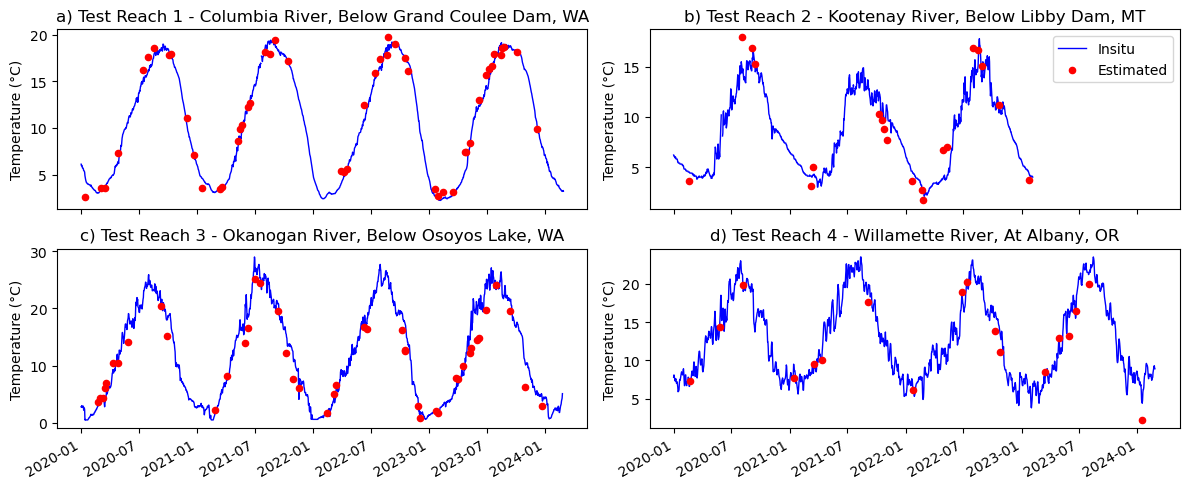

In [8]:
# plot the insitu as line and the Estimated as points
fig, ax = plt.subplots(2, 2, figsize=(12,5), sharex=True)
ax = ax.flatten()

ax[0].plot(insitu_data_1['Date'], insitu_data_1['avg_temp(C)'], label='Insitu', color='blue', zorder=0, lw=1)
ax[0].scatter(test_reach_1['Date'], test_reach_1['y_pred'], label='Estimated', color='red', zorder=1, s=20)

ax[1].plot(insitu_data_2['Date'], insitu_data_2['avg_temp(C)'], label='Insitu', color='blue', zorder=0, lw=1)
ax[1].scatter(test_reach_2['Date'], test_reach_2['y_pred'], label='Estimated', color='red', zorder=1, s=20)

ax[2].plot(insitu_data_3['Date'], insitu_data_3['avg_temp(C)'], label='Insitu', color='blue', zorder=0, lw=1)
ax[2].scatter(test_reach_3['Date'], test_reach_3['y_pred'], label='Estimated', color='red', zorder=1, s=20)

ax[3].plot(insitu_data_4['Date'], insitu_data_4['avg_temp(C)'], label='Insitu', color='blue', zorder=0, lw=1)
ax[3].scatter(test_reach_4['Date'], test_reach_4['y_pred'], label='Estimated', color='red', zorder=1, s=20)

# add titles
ax[0].set_title("a) Test Reach 1 - Columbia River, Below Grand Coulee Dam, WA")
ax[1].set_title("b) Test Reach 2 - Kootenay River, Below Libby Dam, MT")
ax[2].set_title("c) Test Reach 3 - Okanogan River, Below Osoyos Lake, WA")
ax[3].set_title("d) Test Reach 4 - Willamette River, At Albany, OR")

# add y labels
ax[0].set_ylabel("Temperature (°C)")
ax[1].set_ylabel("Temperature (°C)")
ax[2].set_ylabel("Temperature (°C)")
ax[3].set_ylabel("Temperature (°C)")

# add legends at the center left corner
# ax[0].legend(loc='upper left')
ax[1].legend(loc='upper right')
# ax[2].legend(loc='upper left')
# ax[3].legend(loc='upper left')


# format the dates so they are readable
fig.autofmt_xdate()

fig.tight_layout()
fig.savefig('test_reaches.png', dpi=300)

In [9]:
scatter_data_1 = insitu_data_1.merge(test_reach_1, on='Date', how='inner')
scatter_data_2 = insitu_data_2.merge(test_reach_2, on='Date', how='inner')
scatter_data_3 = insitu_data_3.merge(test_reach_3, on='Date', how='inner')
scatter_data_4 = insitu_data_4.merge(test_reach_4, on='Date', how='inner')

In [22]:
# get the regression metrics
rm1 = RegressionMetric(scatter_data_1['avg_temp(C)_x'].to_list(), scatter_data_1['y_pred'].to_list())
rm2 = RegressionMetric(scatter_data_2['avg_temp(C)_x'].to_list(), scatter_data_2['y_pred'].to_list())
rm3 = RegressionMetric(scatter_data_3['avg_temp(C)_x'].to_list(), scatter_data_3['y_pred'].to_list())
rm4 = RegressionMetric(scatter_data_4['avg_temp(C)_x'].to_list(), scatter_data_4['y_pred'].to_list())

list_metrics = ['MAE', 'MSE', 'RMSE', 'R2', 'NSE', 'KGE']

tr1_metrics = rm1.get_metrics_by_list_names(list_metrics)
tr2_metrics = rm2.get_metrics_by_list_names(list_metrics)
tr3_metrics = rm3.get_metrics_by_list_names(list_metrics)
tr4_metrics = rm4.get_metrics_by_list_names(list_metrics)

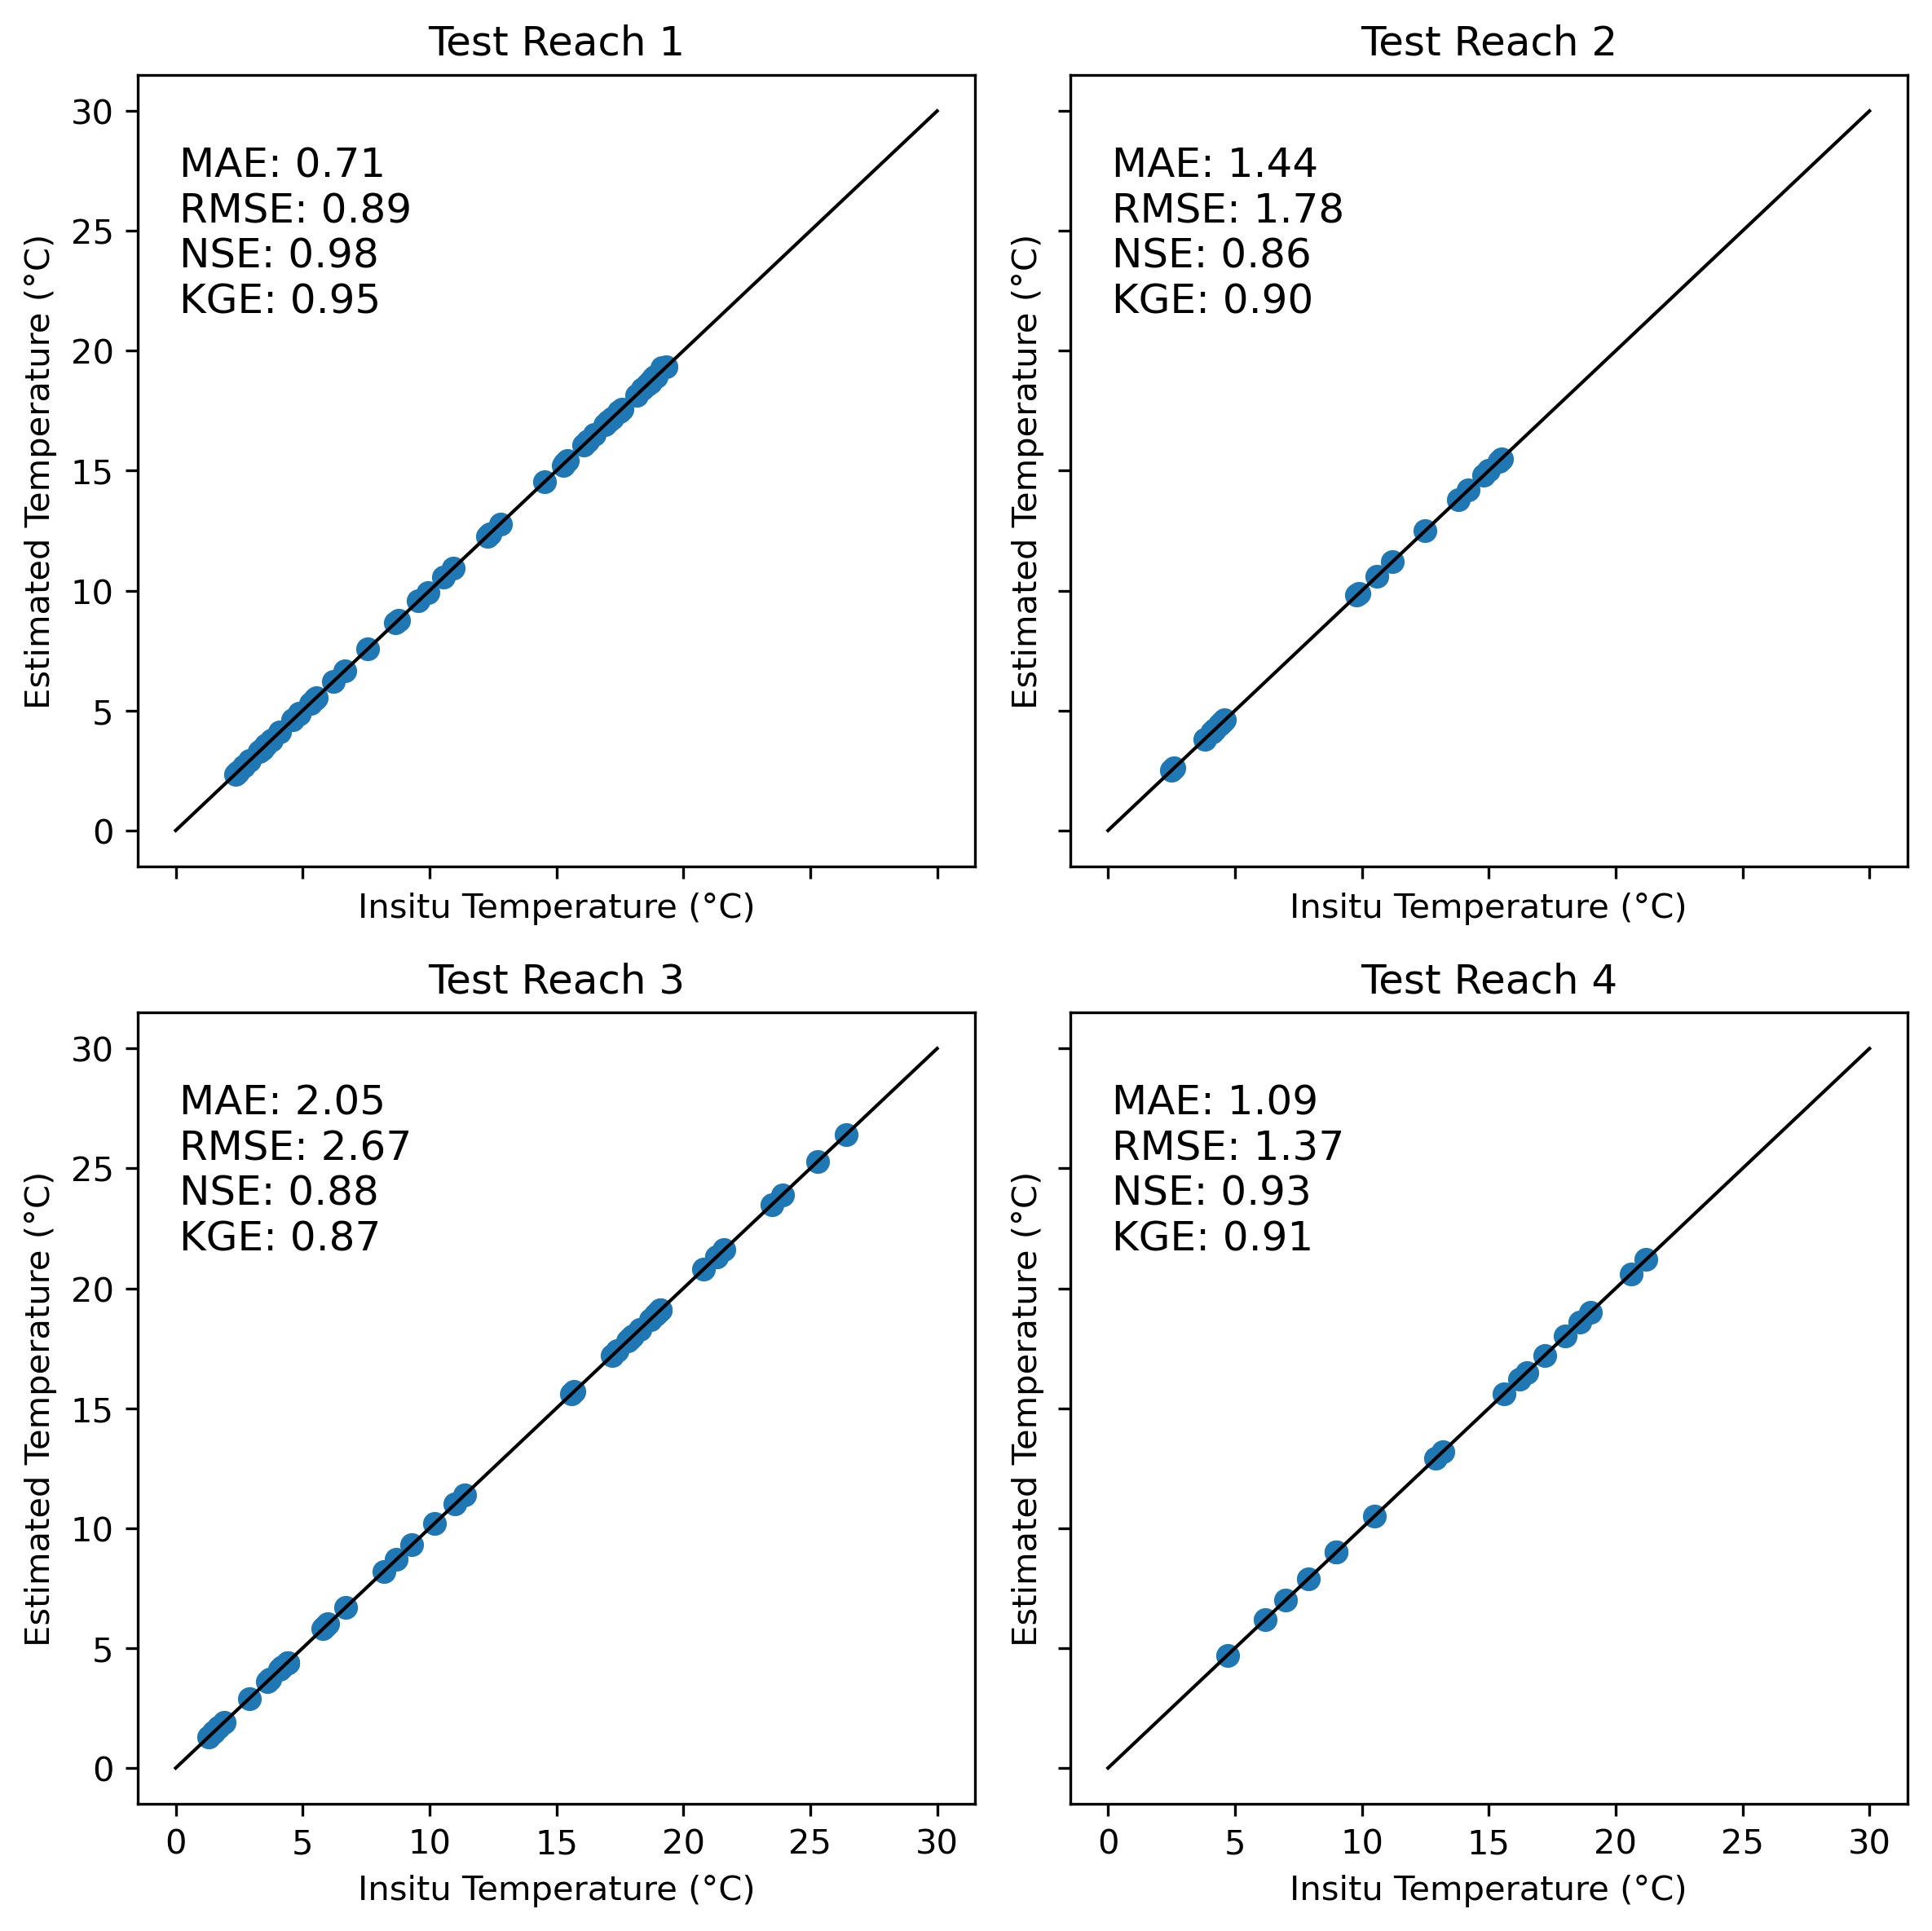

In [27]:
fig, axs = plt.subplots(2, 2, dpi=300, figsize=(8, 8), sharex=True, sharey=True)

axs[0, 0].scatter(scatter_data_1['avg_temp(C)_x'], scatter_data_1['avg_temp(C)_y'])
axs[0, 0].set_title("Test Reach 1")
axs[0, 0].set_xlabel("Insitu Temperature (°C)")
axs[0, 0].set_ylabel("Estimated Temperature (°C)")
# 1-1 line
axs[0, 0].plot([0, 30], [0, 30], color='black', lw=1)
# add metrics
axs[0, 0].text(0.05, 0.7, f"MAE: {tr1_metrics['MAE']:.2f}\nRMSE: {tr1_metrics['RMSE']:.2f}\nNSE: {tr1_metrics['NSE']:.2f}\nKGE: {tr1_metrics['KGE']:.2f}", transform=axs[0, 0].transAxes, fontsize=12)


axs[0, 1].scatter(scatter_data_2['avg_temp(C)_x'], scatter_data_2['avg_temp(C)_y'])
axs[0, 1].set_title("Test Reach 2")
axs[0, 1].set_xlabel("Insitu Temperature (°C)")
axs[0, 1].set_ylabel("Estimated Temperature (°C)")
# 1-1 line
axs[0, 1].plot([0, 30], [0, 30], color='black', lw=1)
# add metrics
axs[0, 1].text(0.05, 0.7, f"MAE: {tr2_metrics['MAE']:.2f}\nRMSE: {tr2_metrics['RMSE']:.2f}\nNSE: {tr2_metrics['NSE']:.2f}\nKGE: {tr2_metrics['KGE']:.2f}", transform=axs[0, 1].transAxes, fontsize=12)

axs[1, 0].scatter(scatter_data_3['avg_temp(C)_x'], scatter_data_3['avg_temp(C)_y'])
axs[1, 0].set_title("Test Reach 3")
axs[1, 0].set_xlabel("Insitu Temperature (°C)")
axs[1, 0].set_ylabel("Estimated Temperature (°C)")
# 1-1 line
axs[1, 0].plot([0, 30], [0, 30], color='black', lw=1)
# add metrics
axs[1, 0].text(0.05, 0.7, f"MAE: {tr3_metrics['MAE']:.2f}\nRMSE: {tr3_metrics['RMSE']:.2f}\nNSE: {tr3_metrics['NSE']:.2f}\nKGE: {tr3_metrics['KGE']:.2f}", transform=axs[1, 0].transAxes, fontsize=12)

axs[1, 1].scatter(scatter_data_4['avg_temp(C)_x'], scatter_data_4['avg_temp(C)_y'])
axs[1, 1].set_title("Test Reach 4")
axs[1, 1].set_xlabel("Insitu Temperature (°C)")
axs[1, 1].set_ylabel("Estimated Temperature (°C)")
# 1-1 line
axs[1, 1].plot([0, 30], [0, 30], color='black', lw=1)
# add metrics
axs[1, 1].text(0.05, 0.7, f"MAE: {tr4_metrics['MAE']:.2f}\nRMSE: {tr4_metrics['RMSE']:.2f}\nNSE: {tr4_metrics['NSE']:.2f}\nKGE: {tr4_metrics['KGE']:.2f}", transform=axs[1, 1].transAxes, fontsize=12)


fig.tight_layout()

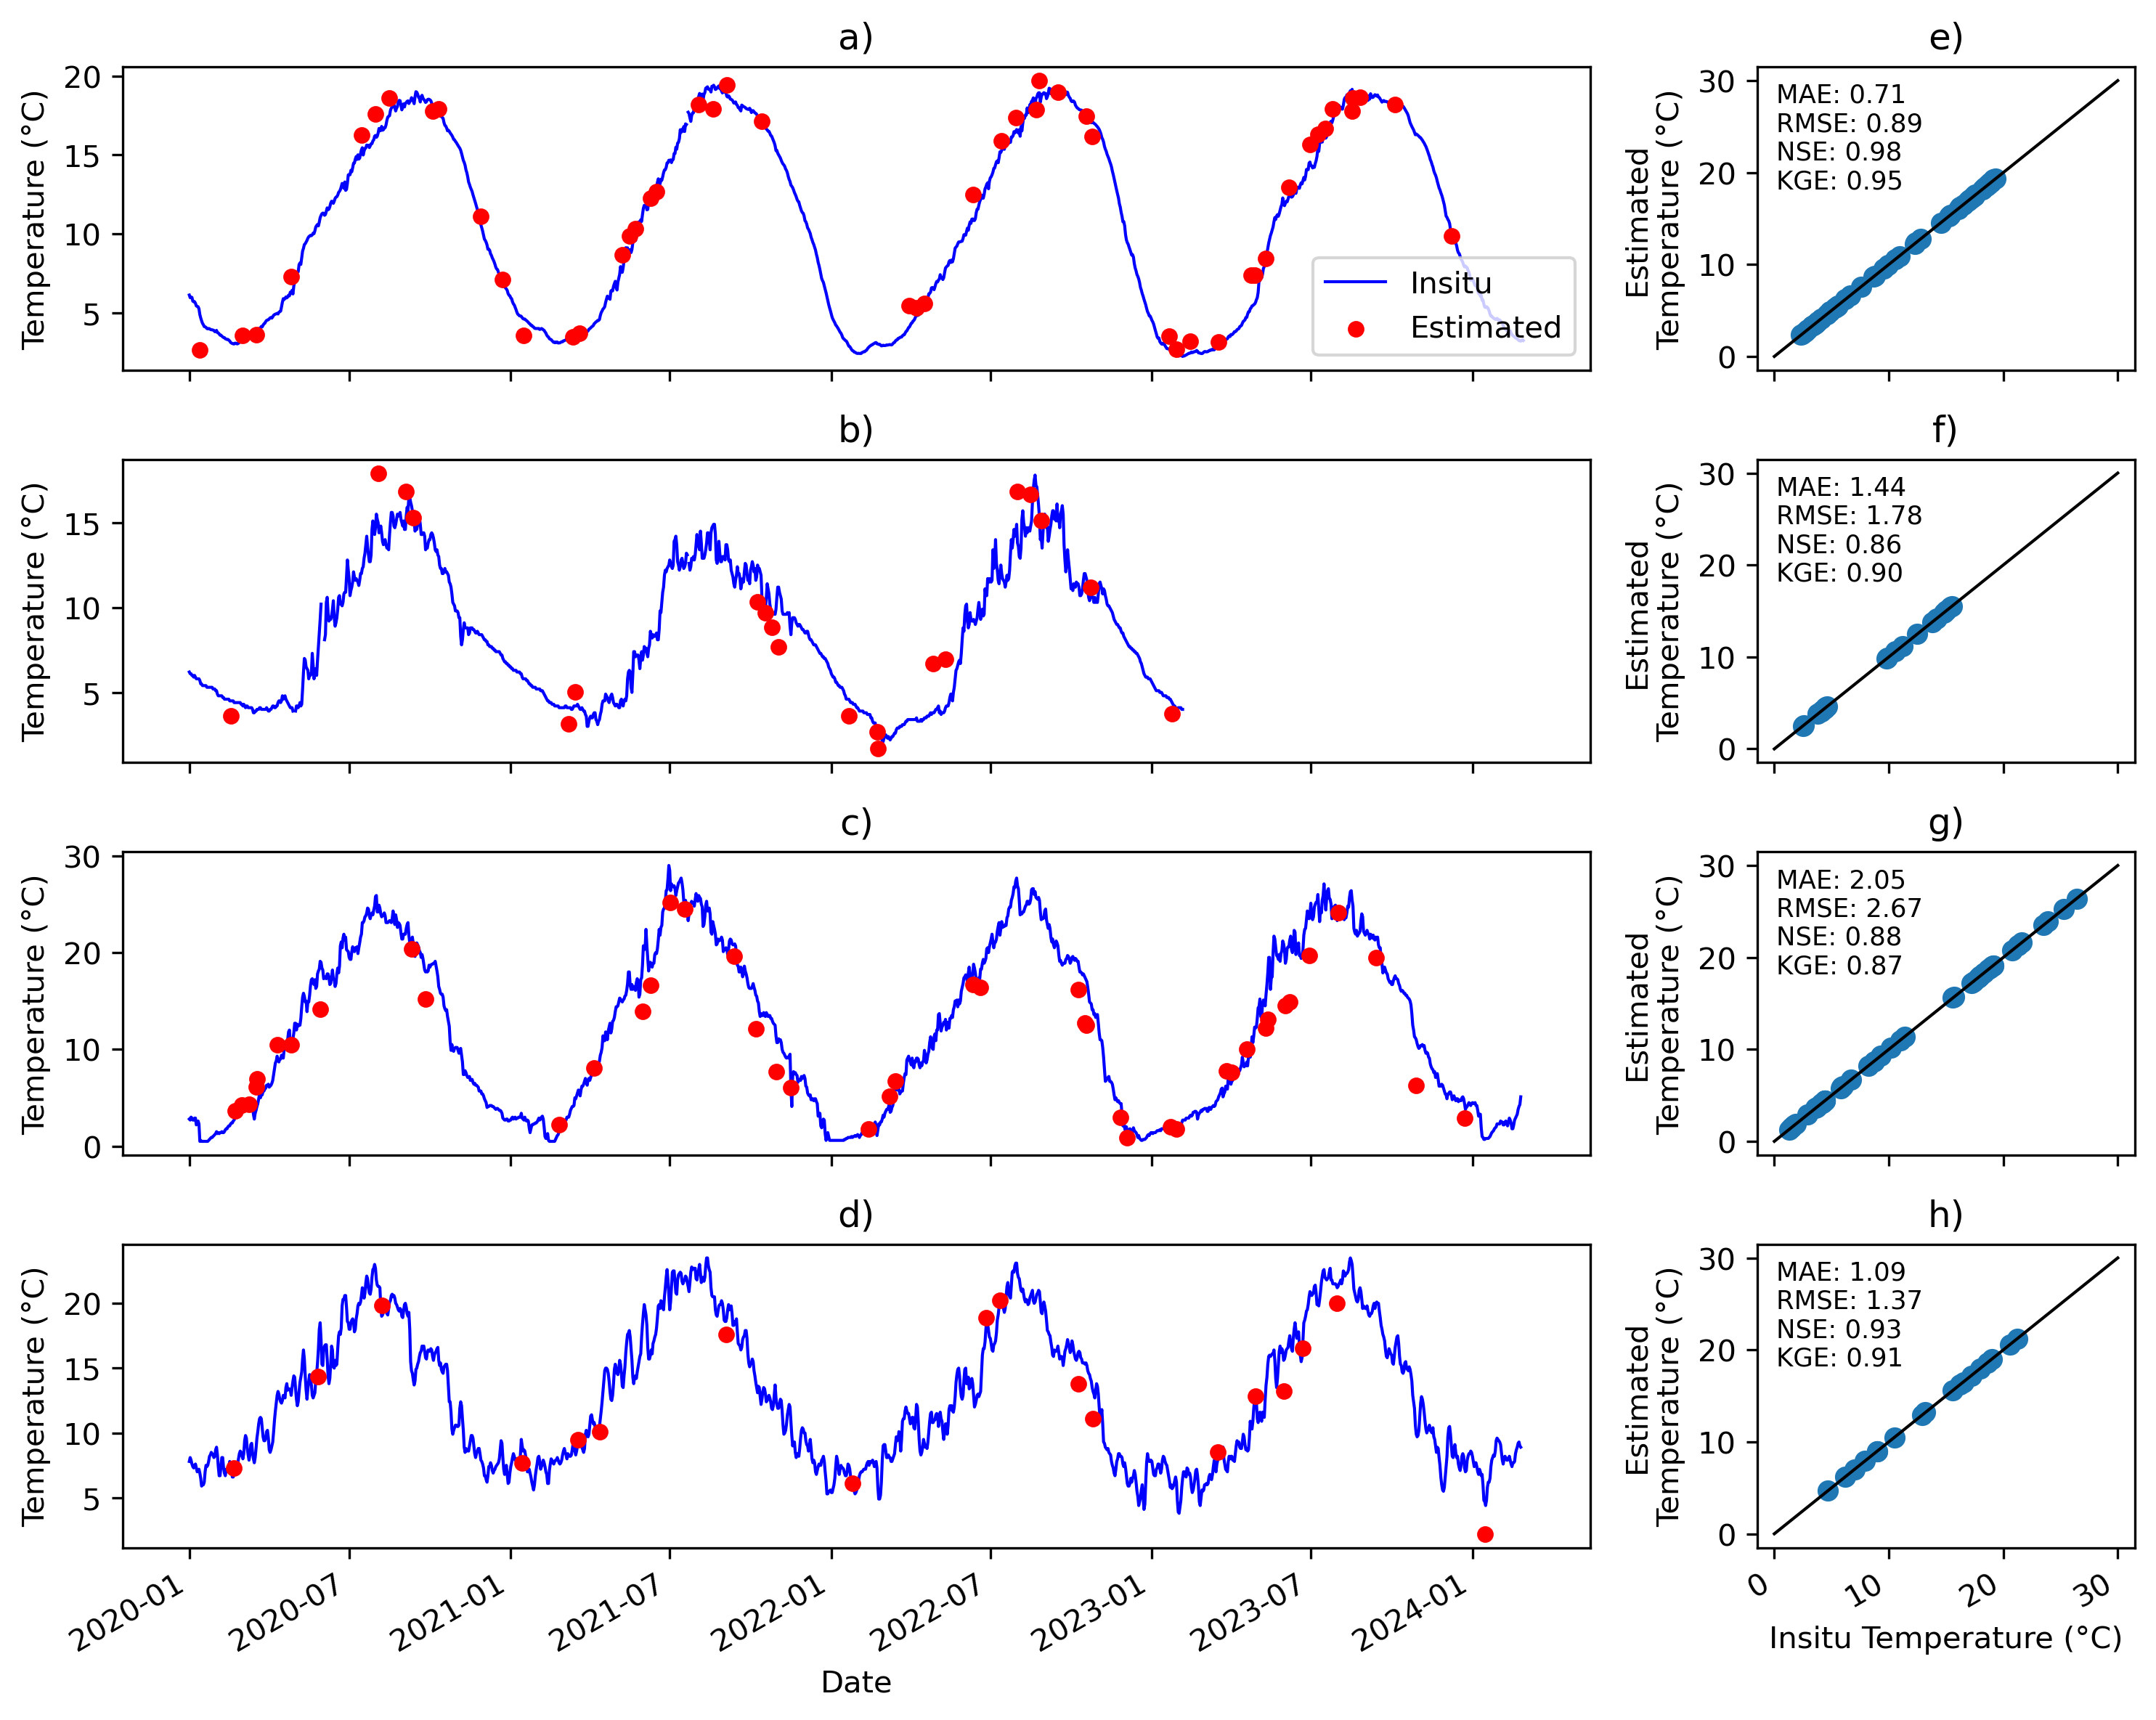

In [53]:
fig = plt.figure(figsize=(10, 8), dpi=300)
ax10 = plt.subplot2grid((4, 4), (0, 0), colspan=3)
ax11 = plt.subplot2grid((4, 4), (0, 3), colspan=1)
ax20 = plt.subplot2grid((4, 4), (1, 0), colspan=3, sharex=ax10)
ax21 = plt.subplot2grid((4, 4), (1, 3), colspan=1)
ax30 = plt.subplot2grid((4, 4), (2, 0), colspan=3, sharex=ax10)
ax31 = plt.subplot2grid((4, 4), (2, 3), colspan=1)
ax40 = plt.subplot2grid((4, 4), (3, 0), colspan=3, sharex=ax10)
ax41 = plt.subplot2grid((4, 4), (3, 3), colspan=1)

ax10.plot(insitu_data_1['Date'], insitu_data_1['avg_temp(C)'], label='Insitu', color='blue', zorder=0, lw=1)
ax10.scatter(test_reach_1['Date'], test_reach_1['y_pred'], label='Estimated', color='red', zorder=1, s=20)

ax20.plot(insitu_data_2['Date'], insitu_data_2['avg_temp(C)'], label='Insitu', color='blue', zorder=0, lw=1)
ax20.scatter(test_reach_2['Date'], test_reach_2['y_pred'], label='Estimated', color='red', zorder=1, s=20)

ax30.plot(insitu_data_3['Date'], insitu_data_3['avg_temp(C)'], label='Insitu', color='blue', zorder=0, lw=1)
ax30.scatter(test_reach_3['Date'], test_reach_3['y_pred'], label='Estimated', color='red', zorder=1, s=20)

ax40.plot(insitu_data_4['Date'], insitu_data_4['avg_temp(C)'], label='Insitu', color='blue', zorder=0, lw=1)
ax40.scatter(test_reach_4['Date'], test_reach_4['y_pred'], label='Estimated', color='red', zorder=1, s=20)

# add titles
# ax10.set_title("a) Test Reach 1 - Columbia River, Below Grand Coulee Dam, WA")
# ax20.set_title("b) Test Reach 2 - Kootenay River, Below Libby Dam, MT")
# ax30.set_title("c) Test Reach 3 - Okanogan River, Below Osoyos Lake, WA")
# ax40.set_title("d) Test Reach 4 - Willamette River, At Albany, OR")
ax10.set_title("a)")
ax20.set_title("b)")
ax30.set_title("c)")
ax40.set_title("d)")

# add y labels
ax10.set_ylabel("Temperature (°C)")
ax20.set_ylabel("Temperature (°C)")
ax30.set_ylabel("Temperature (°C)")
ax40.set_ylabel("Temperature (°C)")
ax40.set_xlabel("Date")

# add legends at the center left corner
# ax10.legend(loc='upper left')
ax10.legend(loc='lower right')
# ax30.legend(loc='upper left')
# ax40.legend(loc='upper left')

ax11.scatter(scatter_data_1['avg_temp(C)_x'], scatter_data_1['avg_temp(C)_y'])
ax11.set_title("e)")
ax11.set_xlabel("Insitu Temperature (°C)")
ax11.set_ylabel("Estimated\nTemperature (°C)")
# 1-1 line
ax11.plot([0, 30], [0, 30], color='black', lw=1)
# add metrics
ax11.text(0.05, 0.6, f"MAE: {tr1_metrics['MAE']:.2f}\nRMSE: {tr1_metrics['RMSE']:.2f}\nNSE: {tr1_metrics['NSE']:.2f}\nKGE: {tr1_metrics['KGE']:.2f}", transform=ax11.transAxes, fontsize=8.5)


ax21.scatter(scatter_data_2['avg_temp(C)_x'], scatter_data_2['avg_temp(C)_y'])
ax21.set_title("f)")
ax21.set_xlabel("Insitu Temperature (°C)")
ax21.set_ylabel("Estimated\nTemperature (°C)")
# 1-1 line
ax21.plot([0, 30], [0, 30], color='black', lw=1)
# add metrics
ax21.text(0.05, 0.6, f"MAE: {tr2_metrics['MAE']:.2f}\nRMSE: {tr2_metrics['RMSE']:.2f}\nNSE: {tr2_metrics['NSE']:.2f}\nKGE: {tr2_metrics['KGE']:.2f}", transform=ax21.transAxes, fontsize=8.5)

ax31.scatter(scatter_data_3['avg_temp(C)_x'], scatter_data_3['avg_temp(C)_y'])
ax31.set_title("g)")
ax31.set_xlabel("Insitu Temperature (°C)")
ax31.set_ylabel("Estimated\nTemperature (°C)")
# 1-1 line
ax31.plot([0, 30], [0, 30], color='black', lw=1)
# add metrics
ax31.text(0.05, 0.6, f"MAE: {tr3_metrics['MAE']:.2f}\nRMSE: {tr3_metrics['RMSE']:.2f}\nNSE: {tr3_metrics['NSE']:.2f}\nKGE: {tr3_metrics['KGE']:.2f}", transform=ax31.transAxes, fontsize=8.5)

ax41.scatter(scatter_data_4['avg_temp(C)_x'], scatter_data_4['avg_temp(C)_y'])
ax41.set_title("h)")
ax41.set_xlabel("Insitu Temperature (°C)")
ax41.set_ylabel("Estimated\nTemperature (°C)")
# 1-1 line
ax41.plot([0, 30], [0, 30], color='black', lw=1)
# add metrics
ax41.text(0.05, 0.6, f"MAE: {tr4_metrics['MAE']:.2f}\nRMSE: {tr4_metrics['RMSE']:.2f}\nNSE: {tr4_metrics['NSE']:.2f}\nKGE: {tr4_metrics['KGE']:.2f}", transform=ax41.transAxes, fontsize=8.5)


# format the dates so they are readable
fig.autofmt_xdate()

fig.tight_layout()
fig.savefig('test_reaches2.png', dpi=300)